### Neural Network Model with a Single Perceptron and One Input Node

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_regression

2024-05-07 18:10:16.643435: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X, y = make_regression(n_samples=30, n_features=1, random_state=1, noise=20)
y = np.reshape(y, (-1, 1))

In [3]:
X = pd.DataFrame(X)

In [4]:
def compute_cost(X, y, W, b):
    m = X.shape[0]
    y_hat = X.to_numpy() @ W + b
    cost = tf.reduce_sum((y - y_hat) ** 2) / (2 * m)
    return cost

In [5]:
def gradiant_descent(W, b, dj_dw, dj_db, learning_rate):
    W.assign_sub(learning_rate * dj_dw)
    b.assign_sub(learning_rate * dj_db)
    return W, b

In [6]:
def nn_model(X, y, W, b, epochs, learning_rate):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            cost = compute_cost(X, y, W, b)
            
            if epoch % 10 == 0:
                print(f'Epoch:{epoch}, Cost: {cost}')

        dj_dw, dj_db = tape.gradient(cost, [W, b])
        
        W, b = gradiant_descent(W, b, dj_dw, dj_db, learning_rate)

    W = W.numpy()
    b = b.numpy()
    return W, b

In [7]:
W = tf.Variable(tf.random.normal((1, 1)), name='W')
b = tf.Variable(tf.random.normal((1, 1)), name='b')

LEARNING_RATE = 0.05
EPOCHS = 200
W, b = nn_model(X, y, W, b, EPOCHS, LEARNING_RATE)

2024-05-07 18:10:20.173537: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch:0, Cost: 766.7469482421875
Epoch:10, Cost: 361.55548095703125
Epoch:20, Cost: 219.15499877929688
Epoch:30, Cost: 168.90525817871094
Epoch:40, Cost: 151.1002960205078
Epoch:50, Cost: 144.7654571533203
Epoch:60, Cost: 142.5023956298828
Epoch:70, Cost: 141.69065856933594
Epoch:80, Cost: 141.39837646484375
Epoch:90, Cost: 141.292724609375
Epoch:100, Cost: 141.25440979003906
Epoch:110, Cost: 141.24044799804688
Epoch:120, Cost: 141.23533630371094
Epoch:130, Cost: 141.2334747314453
Epoch:140, Cost: 141.23280334472656
Epoch:150, Cost: 141.23255920410156
Epoch:160, Cost: 141.23245239257812
Epoch:170, Cost: 141.232421875
Epoch:180, Cost: 141.23240661621094
Epoch:190, Cost: 141.23239135742188


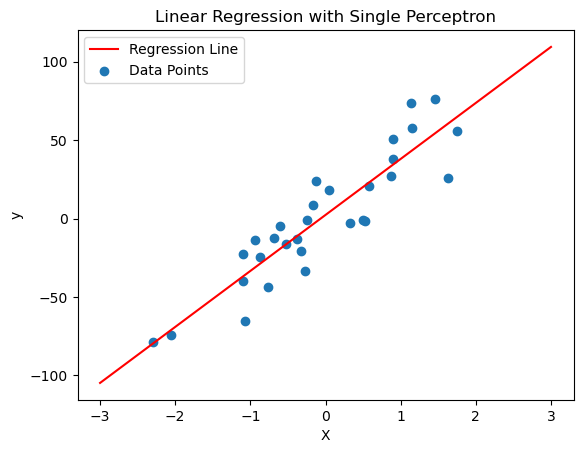

In [8]:
x = np.linspace(-3, 3, 50)
y_pred = x.reshape(-1, 1) @ W + b

plt.plot(x, y_pred, c='r', label='Regression Line')
plt.scatter(X, y, label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Single Perceptron')
plt.legend()
plt.show()